In [16]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns


In [17]:

df = pd.read_csv("heart_attack_youngsters_india.csv")
df.head()


,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [18]:

df["Heart Attack Likelihood"] = df["Heart Attack Likelihood"].map({"Yes":1,"No":0})
X = df.drop("Heart Attack Likelihood",axis=1)
y = df["Heart Attack Likelihood"]


In [19]:

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [20]:

imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)


In [21]:

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [22]:

selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)


In [23]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [24]:

model = GaussianNB(var_smoothing=1e-8)
model.fit(X_train, y_train)


GaussianNB(var_smoothing=1e-08)

In [25]:

y_prob = model.predict_proba(X_test)[:,1]
threshold = 0.25
y_pred = (y_prob >= threshold).astype(int)


In [26]:

print("Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.734
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1592
           1       0.19      0.09      0.12       408

    accuracy                           0.73      2000
   macro avg       0.49      0.50      0.48      2000
weighted avg       0.67      0.73      0.70      2000



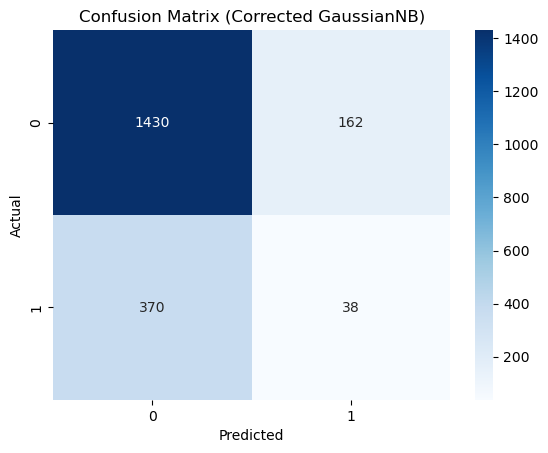

In [27]:

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Corrected GaussianNB)")
plt.show()


ROC AUC: 0.49513190954773867


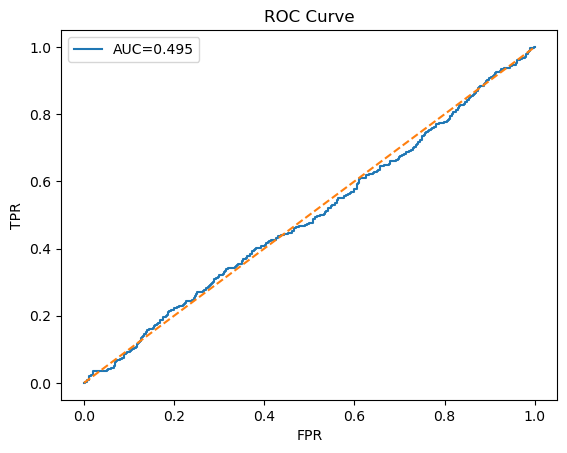

In [28]:

auc = roc_auc_score(y_test,y_prob)
print("ROC AUC:",auc)

fpr,tpr,_ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()


In [29]:
from sklearn.naive_bayes import GaussianNB
import joblib

gnb = GaussianNB()
gnb.fit(X_train, y_train)

joblib.dump(gnb, "Heart Disease GNB.pkl")


['Heart Disease GNB.pkl']